# Digital Signal Processing

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
%matplotlib inline

import numpy as np
import scipy.signal as sig

In [76]:
# plot zeros and poles

def zplane(zeros, poles):
    t = np.linspace(-1,2*np.pi, 100)

    plt.plot(np.cos(t), np.sin(t), '--', color='xkcd:grey')
    plt.plot(np.real(zeros), np.imag(zeros), 'bo', label='zeros', mfc='none')
    plt.plot(np.real(poles), np.imag(poles), 'gx', label='poles')
    plt.grid()

    plt.axis('equal') # makes unit-circle round
    plt.legend(bbox_to_anchor=(1.1, 1.1), loc=2)

## Filter 1

In the first example we evalute a all-pole first order low-pass filter.

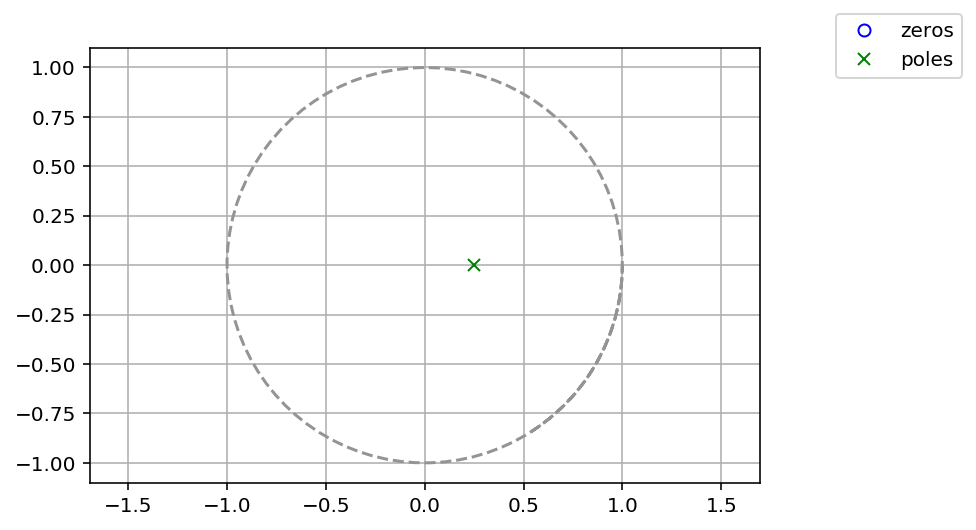

In [129]:
z, p = [], [0.25]
k = 1
zplane(z, p)

<StemContainer object of 3 artists>

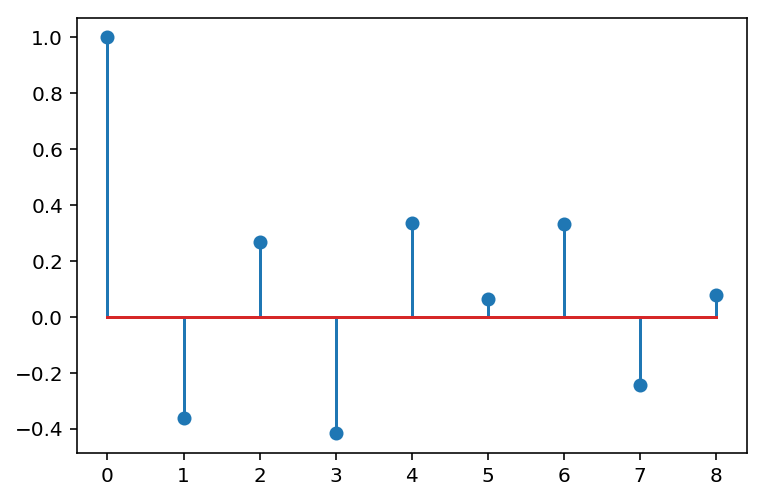

In [179]:
# impulse response

N = 10

b,a = sig.zpk2tf(z,p,k)
x = sig.unit_impulse(N-1)
h = sig.lfilter(b, a, x)

t = np.arange(0,N-1)
plt.stem(t,h)

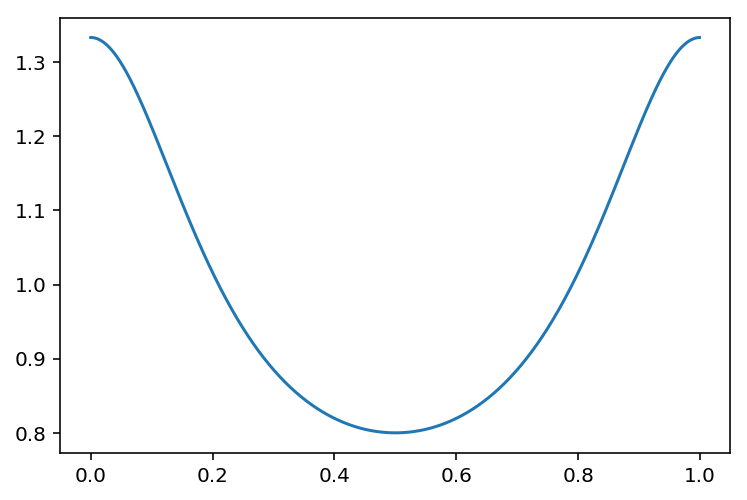

In [169]:
# tansfer function in the frequency domain
nfft = 1024
H = np.fft.fft(h, nfft)
Omega_norm = np.arange(0, 1, 1/nfft)

plt.plot(Omega_norm, H)

## Filter 2

The parameters of this filter are from ex. 33 of the book "Digitale Signalverarbeitung" from Karl-Dirk Kammeyer. There is a all-pol 6th order transfer function given. 

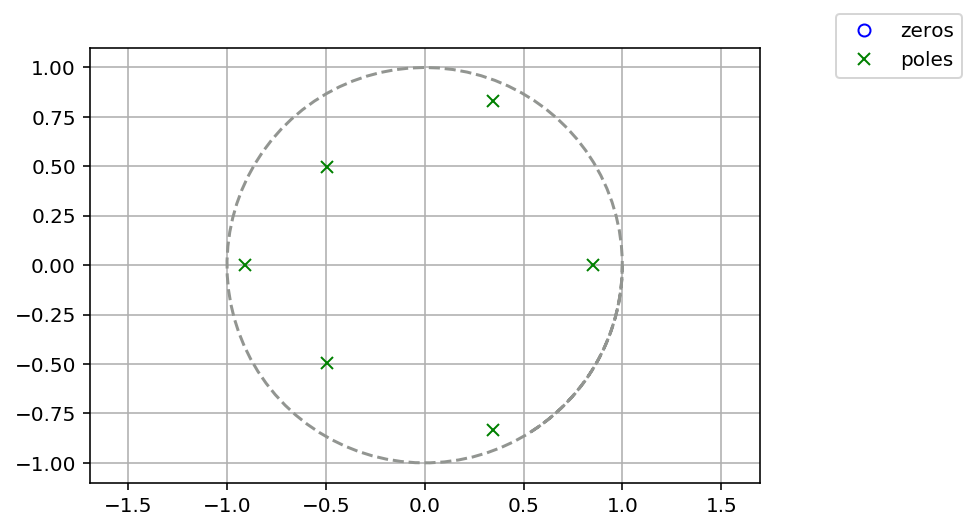

In [175]:
b = [1]
a = [1, 0.3611, -0.1373, 0.2685, -0.0533, -0.3353, -0.307]
m =len(a)-1 # filter order

z,p,k = sig.tf2zpk(b,a)
zplane(z, p)

<StemContainer object of 3 artists>

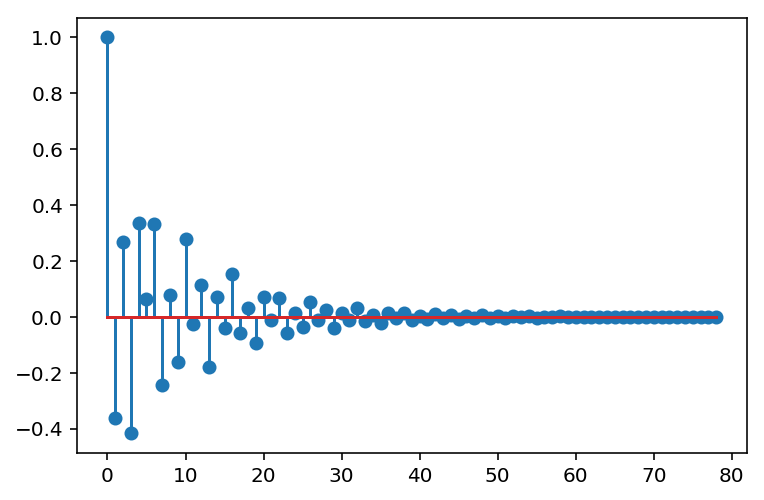

In [178]:
# impulse response

N = 80

b,a = sig.zpk2tf(z,p,k)
x = sig.unit_impulse(N-1)
h = sig.lfilter(b, a, x)

t = np.arange(0,N-1)
plt.stem(t,h)

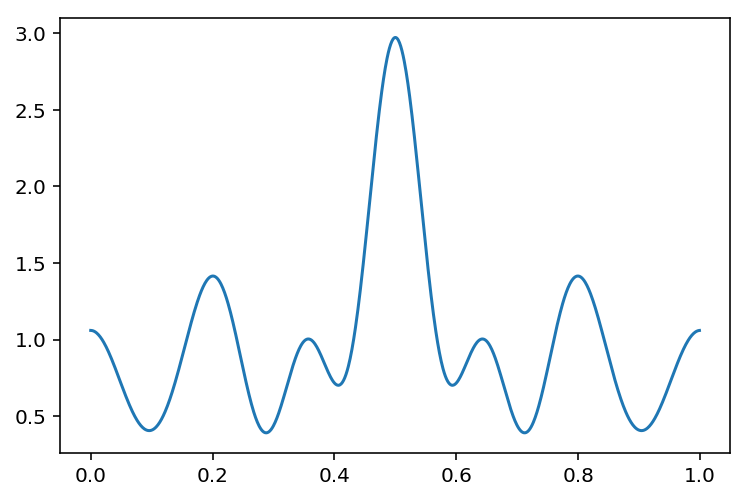

In [180]:
# tansfer function in the frequency domain
nfft = 1024
H = np.fft.fft(h, nfft)
Omega_norm = np.arange(0, 1, 1/nfft)

plt.plot(Omega_norm, H)

## AR-System

(10000,)

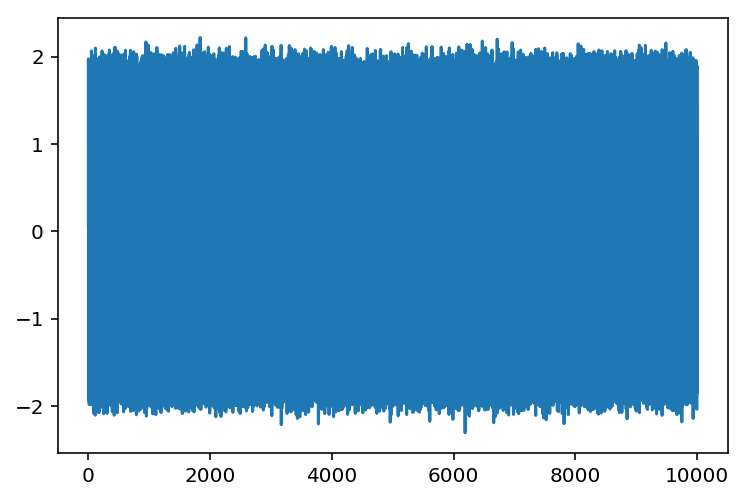

In [196]:
# test signal
fs = 10e3
N = 10e3
t = np.arange(N)/fs
f0 = 2e3
A = 2
x = A*np.sin(2*np.pi*f0*t)
x += np.random.normal(scale=.1, size=t.shape)
plt.plot(x)
t.shape

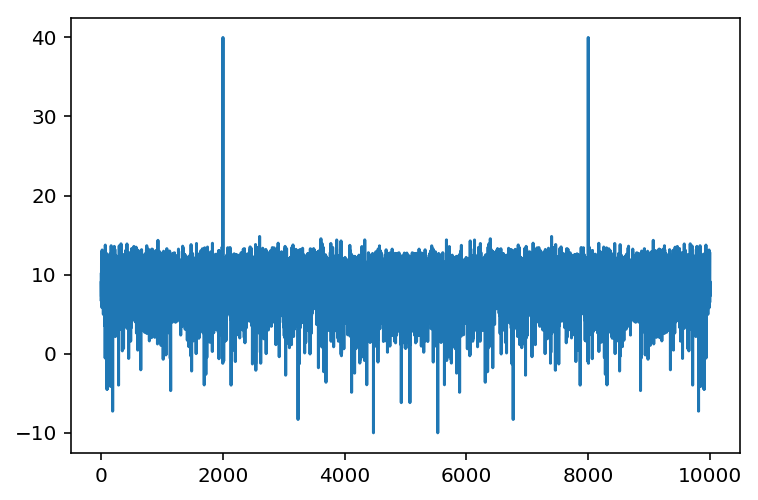

In [197]:
X = np.fft.fft(x)
plt.plot(10*np.log10(abs(X)))

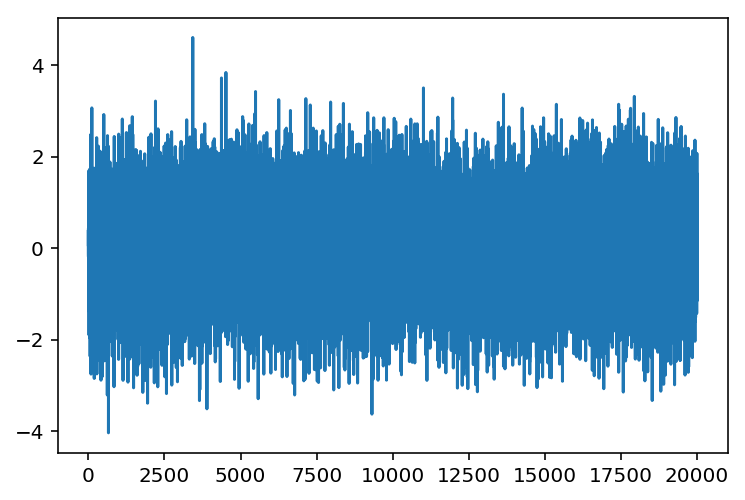